# NBA Season Stats 2018 - 2019: Missing Data and Distribution Plots

1. Use describe() or any other method to see if there is missing data. Add a sentence or short paragraph on your webpage that either states there is no missing data, or describes how much of the data is missing.

2. For 4 different columns, do the following for each column:
   - Plot the distribution of data in that column. The best plot type is probably a bar chart or histogram, but you are welcome to experiment with other plots. The plot should only contain data from that column.
   - Add a title and axes labels to the plot.
   - Add the plot to your webpage, with a few sentences pointing out any interesting featurs in the plot (ex. does the distribution look normal, are there outliers, what are the most likely data values). You can also include opinions here, such as if you are surprised by some aspect of the distribution.

3. Add your Jupyter notebook containing your code to GitHub. It is fine if your notebook also contains notes about the results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

%matplotlib inline

In [2]:
nba = pd.read_csv("nbastats2018-2019.csv")
pd.set_option('display.max_columns', None)

In [3]:
nba

,Name,Height,Weight,Team,Age,Salary,Points,Blocks,Steals,Assists,Rebounds,FT%,FTA,FG3%,FG3A,FG%,FGA,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
0,Alex Abrines,78,200,Oklahoma City Thunder,25,5455236,5.3,0.2,0.5,0.6,1.5,0.923,0.4,0.323,4.1,0.357,5.1,19.0,31,6.3,0.1,0.6,0.6,0.053,12.2,-3.4,-0.2
1,Quincy Acy,79,240,Phoenix Suns,28,213949,1.7,0.4,0.1,0.8,2.5,0.700,1.0,0.133,1.5,0.222,1.8,12.3,10,2.9,-0.1,0.0,-0.1,-0.022,9.2,-5.9,-0.1
2,Jaylen Adams,74,190,Atlanta Hawks,22,236854,3.2,0.1,0.4,1.9,1.8,0.778,0.3,0.338,2.2,0.345,3.2,12.6,34,7.6,-0.1,0.2,0.1,0.011,13.5,-4.4,-0.3
3,Steven Adams,84,265,Oklahoma City Thunder,25,24157304,13.9,1.0,1.5,1.6,9.5,0.500,3.7,0.000,0.0,0.595,10.1,33.4,80,18.5,5.1,4.0,9.1,0.163,16.4,2.7,3.2
4,Bam Adebayo,82,255,Miami Heat,21,2955840,8.9,0.8,0.9,2.2,7.3,0.735,2.8,0.200,0.2,0.576,5.9,23.3,82,17.9,3.4,3.4,6.8,0.171,15.8,3.0,2.4
5,Deng Adel,79,200,NaN,21,-,1.7,0.2,0.1,0.3,1.0,1.000,0.2,0.261,1.2,0.306,1.9,10.2,19,2.7,-0.2,0.0,-0.2,-0.054,9.9,-7.3,-0.3
6,LaMarcus Aldridge,83,260,San Antonio Spurs,33,22347015,21.3,1.3,0.5,2.4,9.2,0.847,5.1,0.238,0.5,0.519,16.3,33.2,81,22.9,6.4,2.9,9.3,0.167,26.9,1.6,2.5
7,Rawle Alkins,77,225,NaN,21,-,3.7,0.0,0.1,1.3,2.6,0.667,1.2,0.250,1.2,0.333,3.9,12.0,10,8.1,-0.1,0.0,-0.1,-0.042,19.0,-6.5,-0.1
8,Grayson Allen,77,198,Utah Jazz,23,2074320,5.6,0.2,0.2,0.7,0.6,0.750,1.6,0.323,2.6,0.376,4.7,10.9,38,7.5,-0.4,0.4,0.0,0.002,24.4,-6.8,-0.5
9,Jarrett Allen,83,237,Brooklyn Nets,20,2034120,10.9,1.5,0.5,1.4,8.4,0.709,3.5,0.133,0.6,0.590,7.1,26.2,80,18.5,4.4,3.3,7.6,0.175,15.9,2.5,2.4


Some data translates to "NaN" because the player either did not record a stat, was moved to a developmental team, or was cut before the end of the season.

In [4]:
nba.describe()

,Height,Weight,Age,Points,Blocks,Steals,Assists,Rebounds,FT%,FTA,FG3%,FG3A,FG%,FGA,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,499.000000,521.000000,489.000000,521.000000,519.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,78.971209,217.516315,25.900192,8.737236,0.397889,0.621497,1.948752,3.661804,0.735144,1.819386,0.312748,2.562956,0.445530,7.126104,19.598848,49.988484,13.247025,1.237236,1.155278,2.393858,0.079063,18.757582,-1.770058,0.577735
std,3.299932,23.522089,4.208236,6.085559,0.405794,0.412589,1.776774,2.527316,0.145222,1.641701,0.130766,2.096460,0.102037,4.574992,8.988803,25.626606,7.058072,1.854837,1.106543,2.742634,0.115215,5.593436,4.942094,1.330516
min,69.000000,166.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,1.000000,-38.100000,-2.800000,-0.500000,-1.700000,-0.946000,0.000000,-52.300000,-2.200000
25%,77.000000,200.000000,23.000000,4.200000,0.100000,0.300000,0.800000,1.900000,0.675000,0.700000,0.287000,0.900000,0.403500,3.700000,12.600000,29.000000,9.800000,0.000000,0.300000,0.300000,0.039000,15.000000,-3.700000,-0.100000
50%,79.000000,215.000000,25.000000,7.100000,0.300000,0.500000,1.300000,3.100000,0.759000,1.300000,0.335000,2.200000,0.440000,6.000000,19.300000,57.000000,12.800000,0.500000,0.900000,1.500000,0.085000,17.800000,-1.500000,0.100000
75%,82.000000,235.000000,29.000000,11.800000,0.500000,0.900000,2.500000,4.700000,0.822000,2.400000,0.371000,3.800000,0.491000,9.600000,27.200000,73.000000,16.600000,1.900000,1.700000,3.500000,0.123000,22.100000,0.500000,0.800000
max,87.000000,290.000000,42.000000,36.100000,2.700000,2.200000,10.700000,15.600000,1.000000,11.000000,1.000000,13.200000,1.000000,24.500000,36.900000,82.000000,80.400000,11.400000,5.900000,15.200000,1.261000,47.200000,14.900000,9.900000


In [5]:
nba.loc[nba.Salary == "-", 'Salary'] = 0

nba["Salary"] = nba.Salary.astype(int)

In [6]:
nba.dtypes

Name         object
Height        int64
Weight        int64
Team         object
Age           int64
Salary        int64
Points      float64
Blocks      float64
Steals      float64
Assists     float64
Rebounds    float64
FT%         float64
FTA         float64
FG3%        float64
FG3A        float64
FG%         float64
FGA         float64
MP          float64
G             int64
PER         float64
OWS         float64
DWS         float64
WS          float64
WS48        float64
USG         float64
BPM         float64
VORP        float64
dtype: object

Text(0,0.5,'Player Efficiency Rating')

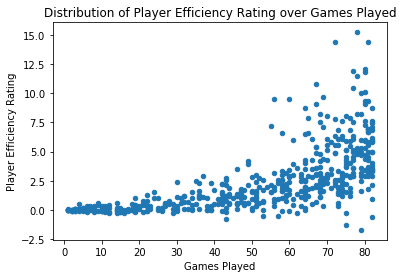

In [7]:
nba.plot.scatter(x = "G", y = "WS")
plt.title("Distribution of Player Efficiency Rating over Games Played")
plt.xlabel("Games Played")
plt.ylabel('Player Efficiency Rating')

Text(0,0.5,'Minutes Played')

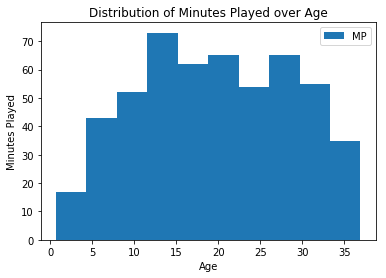

In [8]:
nba.plot.hist(x = "Age", y = "MP")
plt.title("Distribution of Minutes Played over Age")
plt.xlabel("Age")
plt.ylabel("Minutes Played")

In [9]:
nba_team = nba.groupby("Team").max()["Points"]
nba_team

Team
Atlanta Hawks             19.5
Boston Celtics            23.8
Brooklyn Nets             21.1
Charlotte Hornets         25.6
Chicago Bulls             23.7
Cleveland Cavaliers       17.0
Dallas Mavericks          21.2
Denver Nuggets            20.1
Detroit Pistons           24.5
Golden State Warriors     27.3
Houston Rockets           36.1
Indiana Pacers            18.8
Los Angeles Clippers      20.0
Los Angeles Lakers        27.4
Memphis Grizzlies         21.1
Miami Heat                16.6
Milwaukee Bucks           27.7
Minnesota Timberwolves    24.4
New Orleans Pelicans      25.9
New York Knicks           14.8
Oklahoma City Thunder     28.0
Orlando Magic             20.8
Philadelphia 76ers        27.5
Phoenix Suns              26.6
Portland Trail Blazers    25.8
Sacramento Kings          20.7
San Antonio Spurs         21.3
Toronto Raptors           26.6
Utah Jazz                 23.8
Washington Wizards        25.6
Name: Points, dtype: float64

Text(0,0.5,"'max' Points")

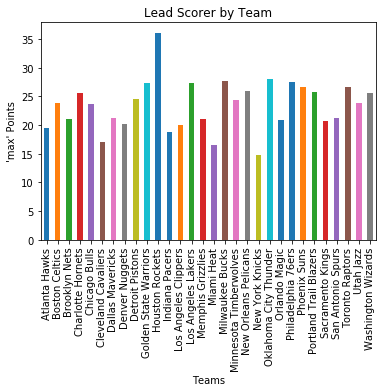

In [10]:
nba_team.plot.bar()
plt.title("Lead Scorer by Team")
plt.xlabel("Teams")
plt.ylabel("'max' Points")

In [11]:
age_counts = nba["Age"].value_counts()
age_counts

23    57
24    47
25    47
22    44
26    43
21    41
28    38
27    33
30    29
29    28
20    25
32    19
31    18
33    17
19    11
34    10
35     3
36     3
37     3
38     3
40     1
42     1
Name: Age, dtype: int64

Text(0,0.5,'Number of Players')

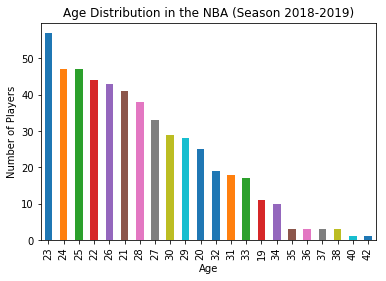

In [12]:
age_counts.plot.bar()
plt.title("Age Distribution in the NBA (Season 2018-2019)")
plt.xlabel("Age")
plt.ylabel("Number of Players")